## Linear Regression Example With TensorFlow
- Using Scikit-Learn's Boston housing data set to practice TensorFlow basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
# load data from sklearn
boston = load_boston()

### Examining The Data
1. Read data set description
2. Load data in Pandas DataFrame
3. Check for missing values / irregularities
4. Visualize data with matplotlib

In [3]:
# check out data description provided by sklearn
dataDescription = boston['DESCR'].split('\n')
for line in dataDescription:
    print line

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- from the description we see there are 14 columns, that the last column (Median Value) is the dependent variable
- our data came separated into data and target lists
- also note that there are no missing values, this will simplify data cleaning

In [4]:
# look at an instance
bostonData = boston['data']
print 'First Row:\n', bostonData[0]
bostonTarget = boston['target']
print 'First Target:\n', bostonTarget[0]

First Row:
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
First Target:
24.0


In [5]:
# combining features and labels to visualize entire data set
completeData = np.column_stack((bostonData, bostonTarget))
print 'First Row Combined:\n', completeData[0]

First Row Combined:
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]


In [6]:
# define column titles, taken from description
columns = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                      'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
# load data to Pandas
bostonDataFrame = pd.DataFrame(data=completeData,
                                columns=columns)

### Examining Data With Pandas

In [7]:
# preview the data
bostonDataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bostonDataFrame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
bostonDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106bde210>,
      dtype=object)

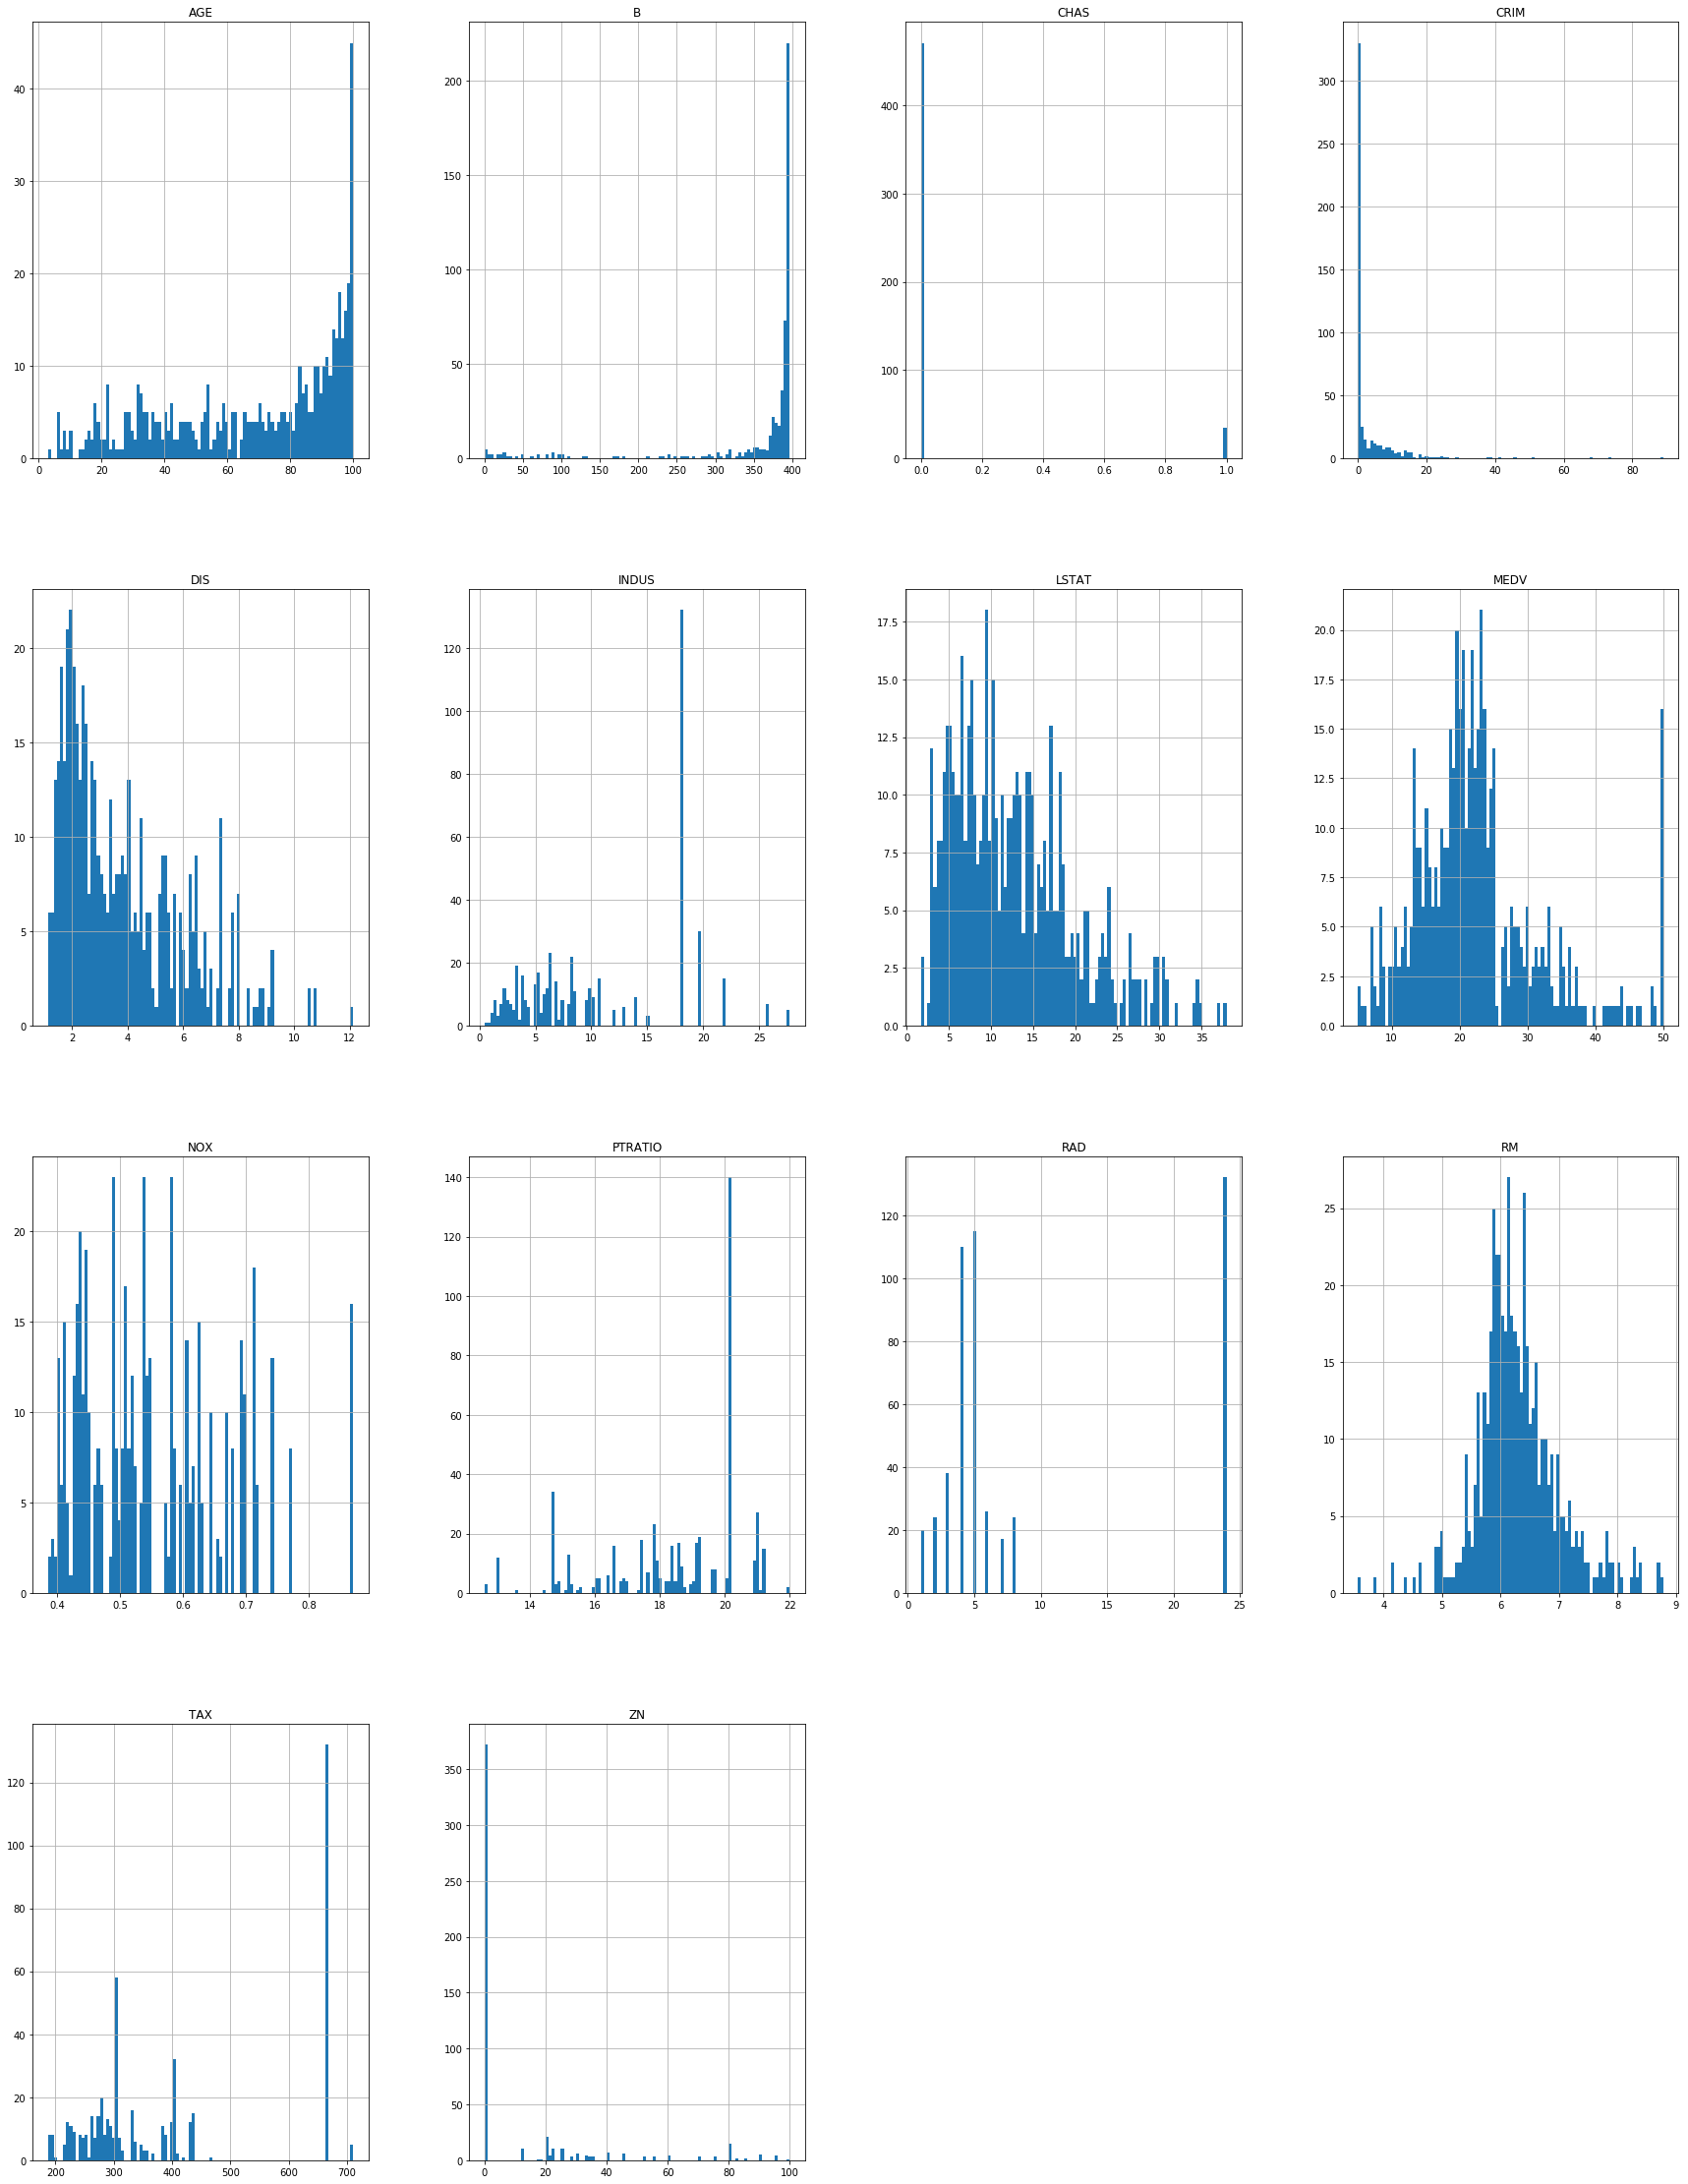

In [10]:
%matplotlib inline
bostonDataFrame.hist(bins=100, figsize=(30,40))

In [11]:
# examine attribute correlations
corr_matrix = bostonDataFrame.corr()
print corr_matrix

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1099907d0>,
      dtype=object)

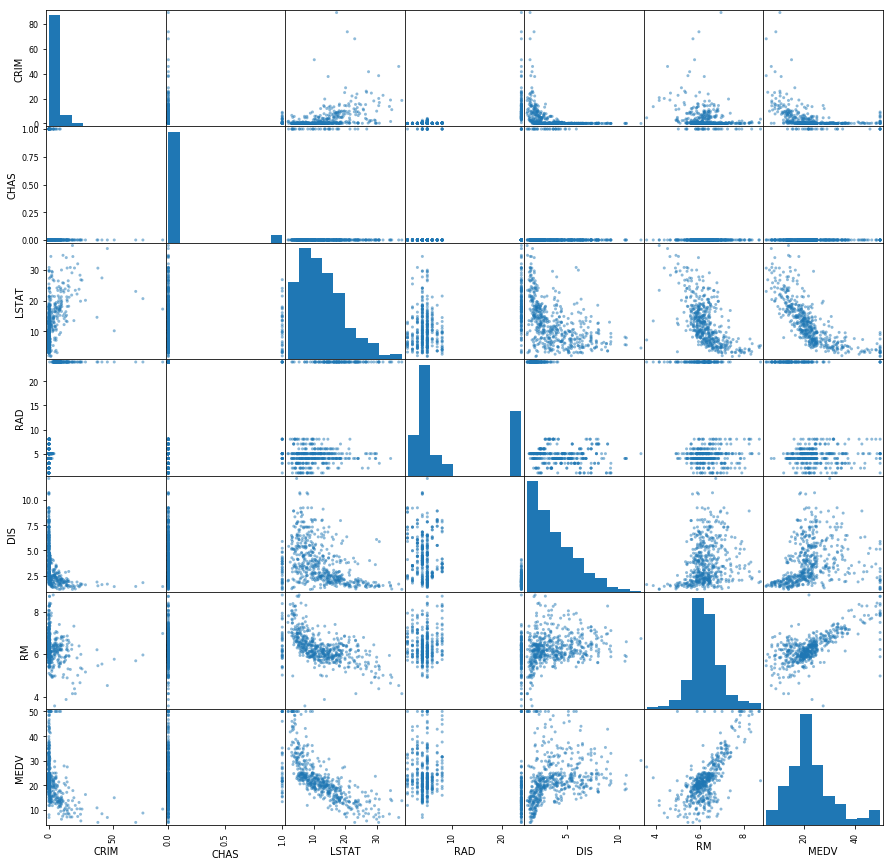

In [12]:
# select some attributes strongly correlated, and plot them with pandas scatter matrix
attributes = ['CRIM', 'CHAS', 'LSTAT', 'RAD', 'DIS', 'RM', 'MEDV']
pd.plotting.scatter_matrix(bostonDataFrame[attributes], figsize=(15, 15))

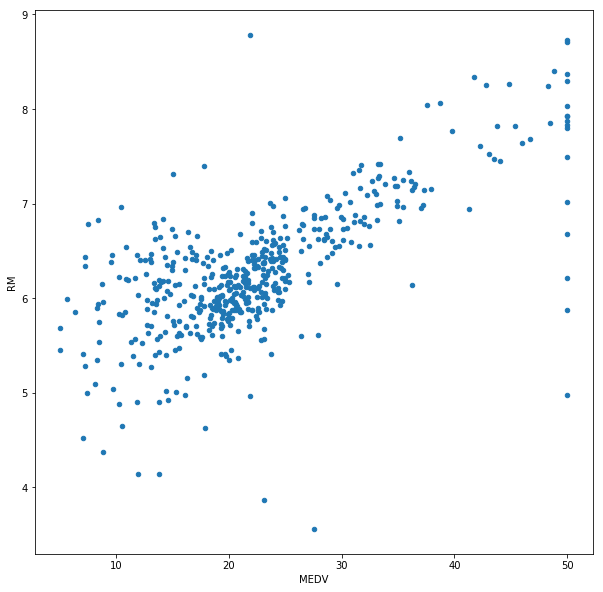

In [13]:
bostonDataFrame.plot(kind='scatter', x='MEDV', y='RM', figsize=(10,10))

### Training a Linear Regression Model with TensorFlow

In [14]:
# start with fresh copy of our data
data = bostonData
labels = bostonTarget

In [15]:
# helper function for normalizing data
def normalize(data):
    mu = np.mean(data,axis=0)
    sigma = np.std(data,axis=0)
    return (data - mu)/sigma

#### Data Pre-Processing

In [16]:
# store shape of data set
rows, cols = np.shape(data)

# normalize data
data = normalize(data)
 
# add bias to data
bias = np.ones((rows, 1), dtype=np.float32)
data = np.column_stack([bias, data])

# re-calc shape now that we've added new column
rows, cols = np.shape(data)

# reshape labels
labels = np.reshape(labels, (rows, 1))

# split into test and train sets
from sklearn.model_selection import train_test_split
trainData, testData, trainLabels, testLabels = train_test_split(
    data, labels, test_size=0.2, random_state=42)

#### Define Learning Parameters

In [17]:
# Defining Learning Params

# larger learning_rate converges quicker but may get stuck in local minimums
learning_rate = 0.01

# number of training iterations
epochs = 1000

# array to store cost history for visualizing
cost_history = np.empty(shape=[1], dtype=float)

#### Define TensorFlow Graph

But first - some terminology:

tf.name_scope()
- used to group variables, placeholders, and operations into categories
- this will clean up the graph for easier visualization.

tf.placeholder()
- TensorFlow graph node used to feed data into the network, placeholders simply output the data fed to them

tf.Variable()
- TensorFlow graph node used to store data that will change over time
- good example is the weights and biases that are modified during training

Operations
- a ton of TensorFlow operations available, check out their [Python docs](https://www.tensorflow.org/api_docs/python/)

In [18]:
# Define TensorFlow graph to carry out linear regression

import tensorflow as tf


# Placeholders for feature and label inputs
with tf.name_scope('Input'):
    X = tf.placeholder(tf.float32,[None, cols], name='Features')
    Y = tf.placeholder(tf.float32,[None, 1], name='Labels')


# Variable Weights will be adjusted during training to minimize loss function
# summary operation used to plot weights distribution
with tf.name_scope('Weights'):
    W = tf.Variable(tf.ones([cols,1]), name='W')
    tf.summary.histogram('weights', W)


# Prediction = W * X
with tf.name_scope('Predictions'):
    y_ = tf.matmul(X, W)


# Cost Function = mean squared error
# summary operation used to record cost during training
with tf.name_scope('Cost'):
    cost = tf.reduce_mean(tf.square(y_ - Y))
    tf.summary.scalar('cost', cost)


# Training Step
# We use TensorFlow's Gradient Descent optimizer to minimize cost!
with tf.name_scope('Train'):
    training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#### Create TensorFlow Session

In [19]:
# initialize session and global graph variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


# create FileWriter object to record results to TensorBoard
writer = tf.summary.FileWriter("tf_logs/run2")
merged_summary = tf.summary.merge_all()
writer.add_graph(sess.graph)

#### Execute Session and Train Model

In [20]:
for epoch in range(epochs):
    
    # run training step
    sess.run(training_step, feed_dict={X: trainData, Y: trainLabels})
    
    # write summary to TensorBoard
    summary = sess.run(merged_summary, feed_dict={X: trainData, Y: trainLabels})
    writer.add_summary(summary)
    
    # record cost for local plot
    cost_history = np.append(cost_history, sess.run(cost, feed_dict={X: trainData, Y: trainLabels}))

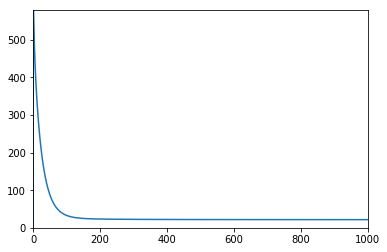

In [21]:
# Plot the cost function to see how it optimized
plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, epochs, 0, np.max(cost_history)])
plt.show()

### Evaluating Model With Test Set

In [22]:
# calculate predictions and mean squared error
pred_y = sess.run(y_, feed_dict={X: testData})
mse = tf.reduce_mean(tf.square(pred_y - testLabels))
print("MSE: %.4f" % sess.run(mse)) 

MSE: 24.7463


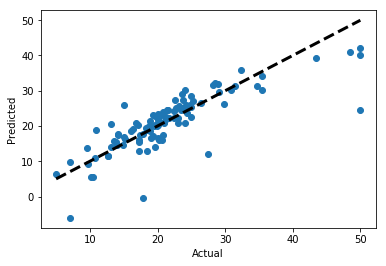

In [25]:
# plot predicted vs actual
fig, ax = plt.subplots()
ax.scatter(testLabels, pred_y)
ax.plot([testLabels.min(), testLabels.max()], [testLabels.min(), testLabels.max()], 'k--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### Visualization With TensorBoard
- check out the output of our FileWriter using TensorBoard
- from terminal, with python env activated, start up tensorboard by specifying the log directory:
```
tensorboard --logdir tf_logs
```
- then point your browser to localhost:6006
- I'll paste some screenshots below to give you an idea

![graph](tensorboard_images/linear-regression/graph.png)
![loss](tensorboard_images/linear-regression/loss.png)
![histogram](tensorboard_images/linear-regression/histogram.png)
![distribution](tensorboard_images/linear-regression/distribution.png)